## Problem Statement (Telecom Churn Prediction)

##### In highly competative telecom industry, it has become extremely crucial for telecom operator to retain the customer who is likely to churn (switch the operator) for better offer and service.telecom company would like to retain the custermer by giving similar or more lucrative offers who is thinking to move to other operator.

##### goal of this assignment is to prepare a predictive model based on machine learning algorithm which chan predict the high value customer who is likely to churn in near future, and identify the factor affecting the churn itself.



In [3]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import warnings
sns.set(style = 'white')
import os
warnings.filterwarnings ("ignore") 

In [3]:
#Utility functions
from datetime import date
from dateutil.relativedelta import relativedelta

def last_day_of_month(any_day):
    return any_day + relativedelta(day=31)

def view_null_values(t_df,perc):
    
    null_series=100*t_df.isna().sum()/len(t_df)
    null_df=pd.DataFrame(null_series)
    null_df=null_df[null_df[0]>perc]
    print(null_df[0].sort_values(ascending=False))


In [4]:
url='https://drive.google.com/file/d/1SWnADIda31mVFevFcfkGtcgBHTKKI94J/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
print(df.head())

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...     

In [5]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### 1. Import the data and understand the summary

In [6]:
#telecom_df = pd.read_csv('telecom_churn_data.csv')

In [7]:
telecom_df=df.copy()
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [8]:
telecom_df.info()#verbose=1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


#### Unserstanding:There are broadly three categories of categories.
##### 1. MOU   - Minutes of usage calls
##### 2. RECH  - Recharge (related attributes are more use as as per problem statement we will be focusing on the usage based churn)
##### 3. ARPU  - Average revenue per user (Revenue based columns may be good indicator but we will use only if required)

### Null Value Analysis

In [10]:
view_null_values(telecom_df,50)

date_of_last_rech_data_6    74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
av_rech_amt_data_6          74.846748
total_rech_data_6           74.846748
max_rech_data_7             74.428744
date_of_last_rech_data_7    74.428744
fb_user_7                   74.428744
night_pck_user_7            74.428744
arpu_2g_7                   74.428744
arpu_3g_7                   74.428744
av_rech_amt_data_7          74.428744
total_rech_data_7           74.428744
count_rech_2g_7             74.428744
count_rech_3g_7             74.428744
arpu_3g_9                   74.077741
max_rech_data_9             74.077741
night_pck_user_9            74.077741
total_rech_data_9           74.077741
date_of_last_rech_data_9    74.077741
arpu_2g_9                   74.077741
count_rech_3

#### Understanding:
###### There are huge null values for some of the columns, we will treat the null values for usage related columns 

#### 2. Treating Null Values

#### Considering recharge based columns 

In [11]:
rechrd_cols =  telecom_df.columns[telecom_df.columns.str.contains('rech_')]
print(rechrd_cols)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [12]:
view_null_values(telecom_df,50)

date_of_last_rech_data_6    74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
av_rech_amt_data_6          74.846748
total_rech_data_6           74.846748
max_rech_data_7             74.428744
date_of_last_rech_data_7    74.428744
fb_user_7                   74.428744
night_pck_user_7            74.428744
arpu_2g_7                   74.428744
arpu_3g_7                   74.428744
av_rech_amt_data_7          74.428744
total_rech_data_7           74.428744
count_rech_2g_7             74.428744
count_rech_3g_7             74.428744
arpu_3g_9                   74.077741
max_rech_data_9             74.077741
night_pck_user_9            74.077741
total_rech_data_9           74.077741
date_of_last_rech_data_9    74.077741
arpu_2g_9                   74.077741
count_rech_3

#### Unserstanding : 

we have seens in recharge columns there are lots of missing values in _data recharge attribute, where as respective voce calls (_amt) attributes have less null values. 
It is quite possible that user might not have recharged data while doing voice call, so we will replace the values with 0

In [13]:
#telecom_df=telecom_df.drop(['total_rech_data_6','max_rech_data_6','date_of_last_rech_data_6','date_of_last_rech_data_7','max_rech_data_7','total_rech_data_7','max_rech_data_9','total_rech_data_9',
#'date_of_last_rech_data_9','date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8'],axis=1)

In [14]:
telecom_df['total_rech_data_6']=telecom_df['total_rech_data_6'].fillna(0)
telecom_df['total_rech_data_7']=telecom_df['total_rech_data_7'].fillna(0)
telecom_df['total_rech_data_8']=telecom_df['total_rech_data_8'].fillna(0)
telecom_df['total_rech_data_9']=telecom_df['total_rech_data_9'].fillna(0)
telecom_df['av_rech_amt_data_6']=telecom_df['av_rech_amt_data_6'].fillna(0)
telecom_df['av_rech_amt_data_7']=telecom_df['av_rech_amt_data_7'].fillna(0)
telecom_df['av_rech_amt_data_8']=telecom_df['av_rech_amt_data_8'].fillna(0)
telecom_df['av_rech_amt_data_9']=telecom_df['av_rech_amt_data_9'].fillna(0)

_Max recharge attributes having having huge null value can be dropped as those are calculated columns and might have been data collection issue.

In [15]:
telecom_df=telecom_df.drop(['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9'
],axis=1)

_last_date colums could be useful and logically null be replaced by

In [16]:
last_day_of_month(date(2014,6,10))

datetime.date(2014, 6, 30)

In [17]:
telecom_df['date_of_last_rech_data_6']=telecom_df['date_of_last_rech_data_6'].fillna(last_day_of_month(date(2014,6,10)))
telecom_df['date_of_last_rech_data_7']=telecom_df['date_of_last_rech_data_7'].fillna(last_day_of_month(date(2014,7,10)))
telecom_df['date_of_last_rech_data_8']=telecom_df['date_of_last_rech_data_8'].fillna(last_day_of_month(date(2014,8,10)))
telecom_df['date_of_last_rech_data_9']=telecom_df['date_of_last_rech_data_9'].fillna(last_day_of_month(date(2014,9,10)))


In [18]:
telecom_df.shape

(99999, 222)

In [19]:
view_null_values(telecom_df,7)

count_rech_2g_6     74.846748
fb_user_6           74.846748
night_pck_user_6    74.846748
count_rech_3g_6     74.846748
arpu_2g_6           74.846748
arpu_3g_6           74.846748
arpu_3g_7           74.428744
fb_user_7           74.428744
count_rech_2g_7     74.428744
night_pck_user_7    74.428744
count_rech_3g_7     74.428744
arpu_2g_7           74.428744
fb_user_9           74.077741
count_rech_2g_9     74.077741
count_rech_3g_9     74.077741
arpu_3g_9           74.077741
arpu_2g_9           74.077741
night_pck_user_9    74.077741
arpu_3g_8           73.660737
count_rech_3g_8     73.660737
arpu_2g_8           73.660737
night_pck_user_8    73.660737
count_rech_2g_8     73.660737
fb_user_8           73.660737
isd_ic_mou_9         7.745077
ic_others_9          7.745077
onnet_mou_9          7.745077
offnet_mou_9         7.745077
std_ic_mou_9         7.745077
roam_ic_mou_9        7.745077
roam_og_mou_9        7.745077
loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_9     7.745077
loc_og_t2f

_count and _arpu attributes having null values more that50 % can be dropped as this looks like data collection time issue and cannot have mean value for such huge count

In [20]:
telecom_df=telecom_df.drop(['count_rech_3g_6','count_rech_2g_6','count_rech_3g_7','count_rech_2g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9',
'arpu_2g_6','arpu_3g_6','arpu_2g_7','arpu_3g_7','arpu_2g_8','arpu_3g_8','arpu_2g_9','arpu_3g_9'],axis=1)

In [21]:
view_null_values(telecom_df,50)

night_pck_user_6    74.846748
fb_user_6           74.846748
night_pck_user_7    74.428744
fb_user_7           74.428744
night_pck_user_9    74.077741
fb_user_9           74.077741
night_pck_user_8    73.660737
fb_user_8           73.660737
Name: 0, dtype: float64


### 1. Data preparation 

In [22]:
telecom_df.shape

(99999, 206)

##### a) Recharge columns is basis for calculating high value customers, lets derive total average recharge for voice and data 

In [23]:
telecom_df['total_rech_amt_data_6'] = telecom_df.av_rech_amt_data_6 * telecom_df.total_rech_data_6
telecom_df['total_rech_amt_data_7'] = telecom_df.av_rech_amt_data_7 * telecom_df.total_rech_data_7
telecom_df['total_rech_amt_data_8'] = telecom_df.av_rech_amt_data_8 * telecom_df.total_rech_data_8

In [24]:
telecom_df['total_avg_rech_amnt_6_7_GPhase'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_amt_data_6 \
                                               + telecom_df.total_rech_amt_7+ telecom_df.total_rech_amt_data_7)/2

##### b) derive high value customer

In [25]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom_df.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)

print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter))

telecom_df_high_val_cust = telecom_df[telecom_df.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
print('Dataframe Shape after Filtering High Value Customers: ' + str(telecom_df_high_val_cust.shape))

70 percentile of 6th and 7th months avg recharge amount: 478.0
Dataframe Shape after Filtering High Value Customers: (29953, 210)


##### c) Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
##### The attributes you need to use to tag churners are:total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9
After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [26]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [27]:
telecom_df_high_val_cust['churn']=telecom_df_high_val_cust.apply(lambda x: 1 if (x.total_ic_mou_9 == 0) & (x.total_og_mou_9 == 0) & (x.vol_2g_mb_9 ==0) & (x.vol_3g_mb_9 ==0) else 0,axis=1)

In [28]:
100*telecom_df_high_val_cust.churn.sum()/len(telecom_df_high_val_cust)

8.122725603445398

as churn tagging is complete , remove the _9 columns 

In [29]:
churn_month_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('_9')]
telecom_df_high_val_cust.drop(churn_month_columns,axis=1,inplace=True)

### EDA

##### removing few columns which has low unique count and would not be usefull for modeling

In [34]:
cols_uniquevalies =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [35]:
for col in cols_uniquevalies:
    #print(pd.api.types.is_categorical_dtype(np.array(telecom_df_high_val_cust[col])))
    print(col,'--',len(telecom_df_high_val_cust[col].unique()),'--',telecom_df_high_val_cust[col].unique())

circle_id -- 1 -- [109]
loc_og_t2o_mou -- 2 -- [ 0. nan]
std_og_t2o_mou -- 2 -- [ 0. nan]
loc_ic_t2o_mou -- 2 -- [ 0. nan]
last_date_of_month_6 -- 1 -- ['6/30/2014']
last_date_of_month_7 -- 2 -- ['7/31/2014' nan]
last_date_of_month_8 -- 2 -- ['8/31/2014' nan]
std_og_t2c_mou_6 -- 2 -- [nan  0.]
std_og_t2c_mou_7 -- 2 -- [nan  0.]
std_og_t2c_mou_8 -- 2 -- [ 0. nan]
std_ic_t2o_mou_6 -- 2 -- [nan  0.]
std_ic_t2o_mou_7 -- 2 -- [nan  0.]
std_ic_t2o_mou_8 -- 2 -- [ 0. nan]


In [37]:
telecom_df_high_val_cust.drop(cols_uniquevalies,axis=1,inplace=True)

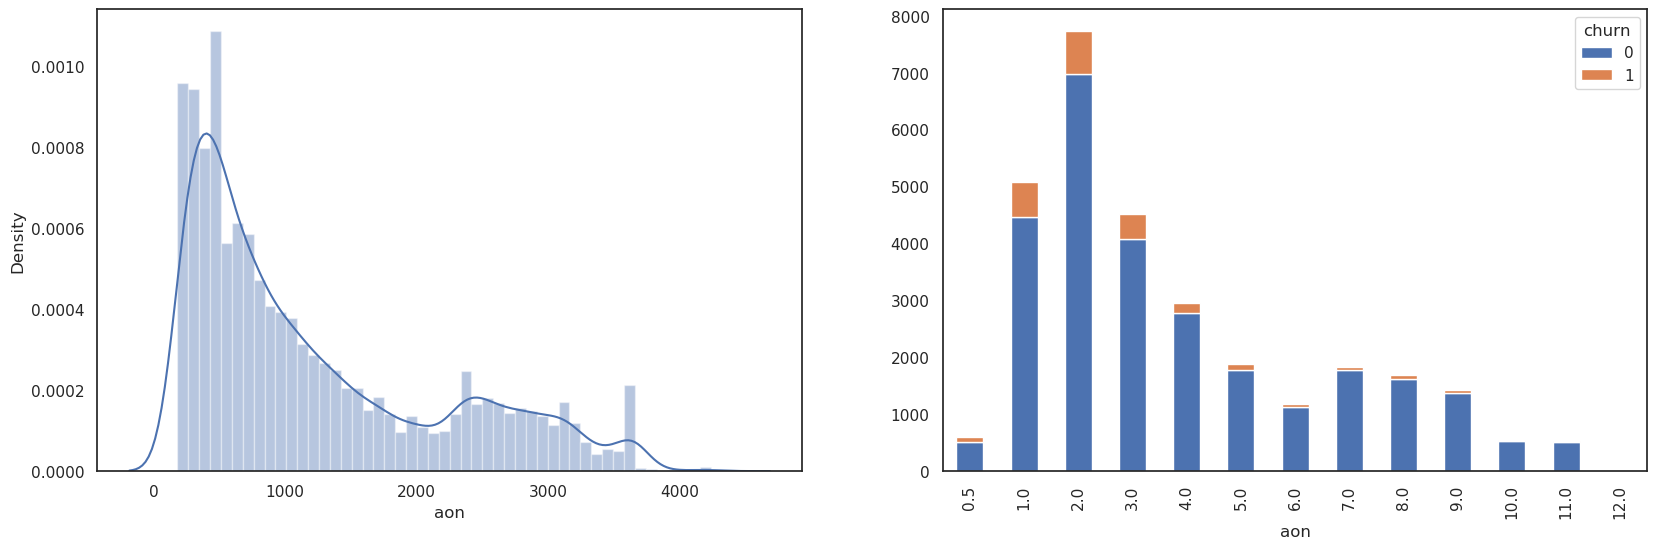

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(telecom_df_high_val_cust['aon'], ax=ax1)

bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

pd.crosstab(pd.cut(round(((telecom_df_high_val_cust['aon']/30)/12),1), bins = bins, labels = labels ), telecom_df_high_val_cust['churn']).plot(kind='bar', stacked=True, ax = ax2)
plt.show()

##### Understanding: We can see for duration of 1-3 years have highest customers and have more churna in this periods

#### Analysing recharg colum against churn

In [77]:
 def box_plot(df,col):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=col+"_6",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=col+"_7",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=col+"_8",x="churn",hue="churn",
                showfliers=False)
    plt.title(col)
    plt.show()

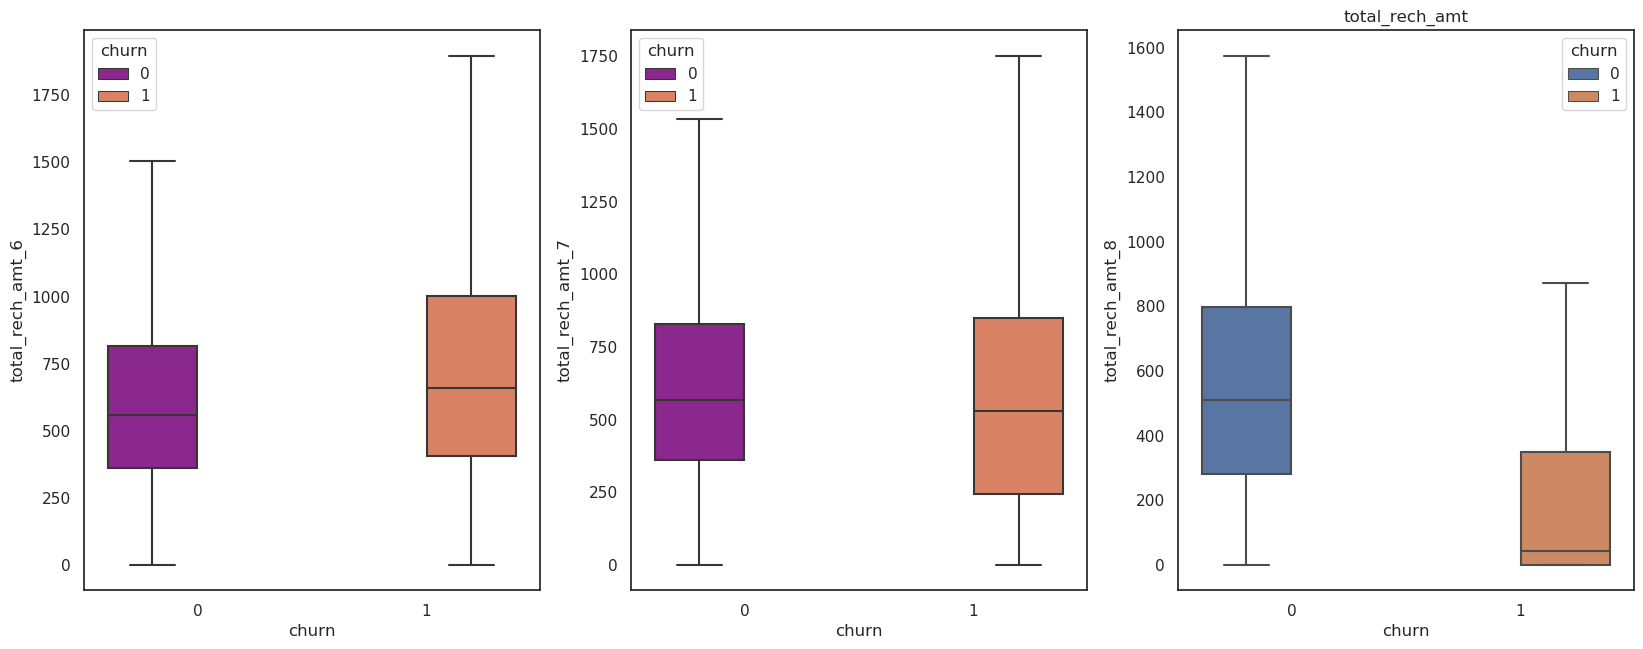

------------------------------------------------------------------------------------------


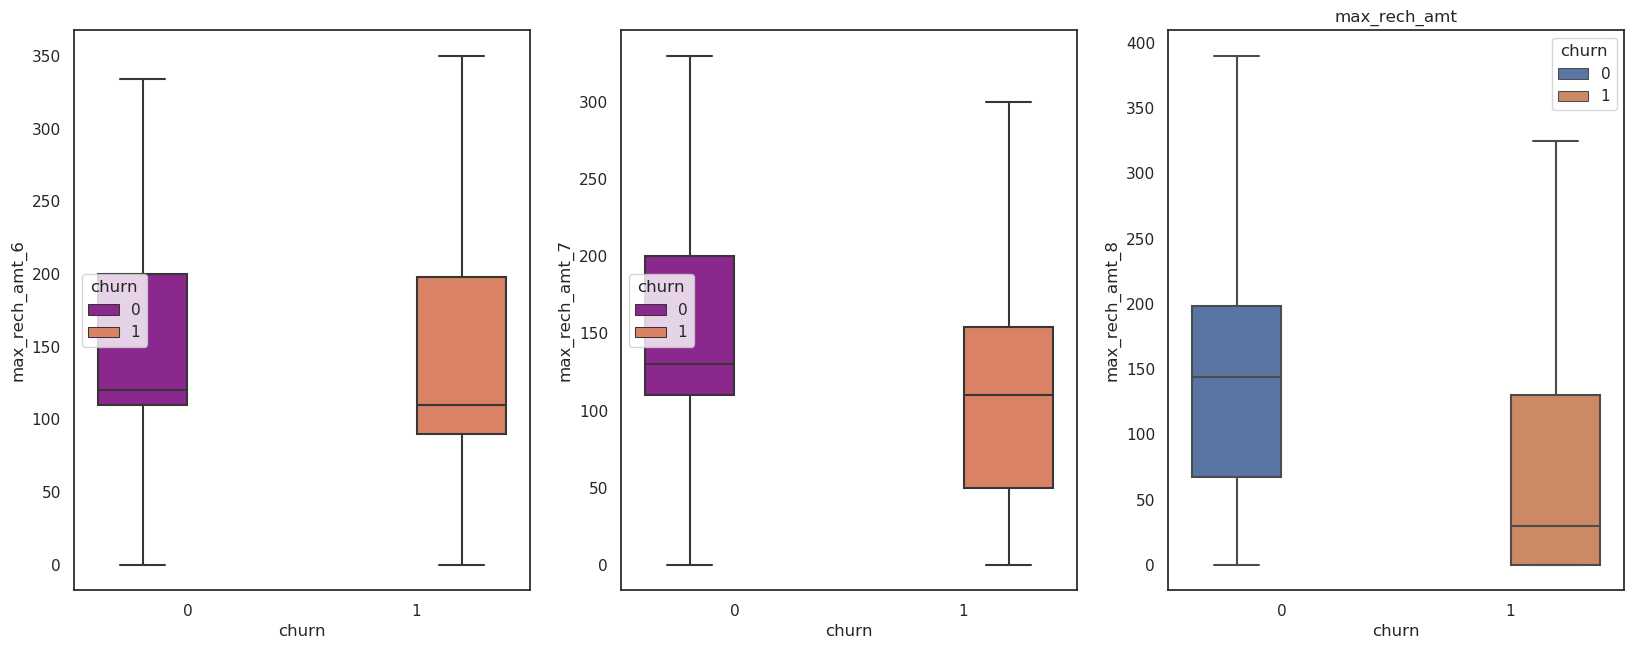

------------------------------------------------------------------------------------------


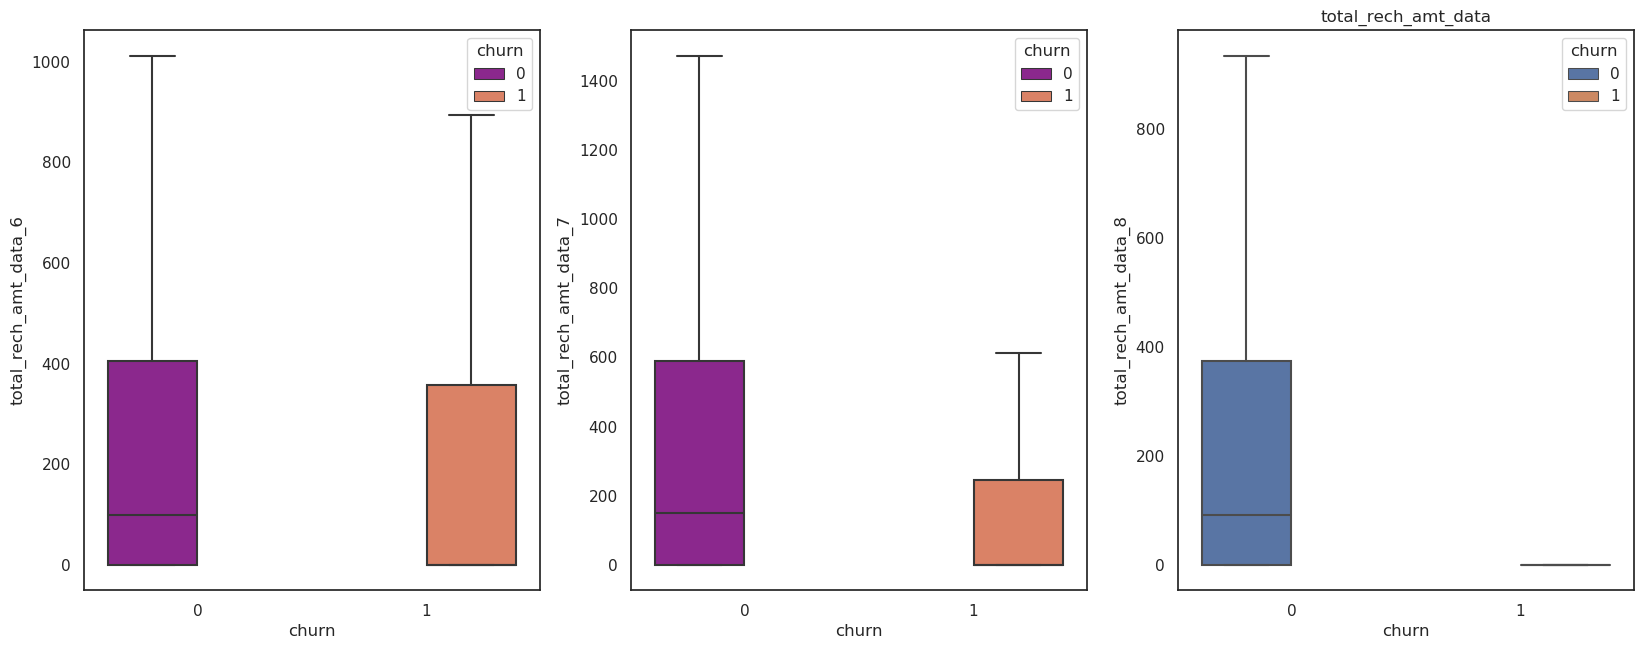

In [78]:
box_plot(telecom_df_high_val_cust,'total_rech_amt')
print('------------------------------------------------------------------------------------------')
box_plot(telecom_df_high_val_cust,'max_rech_amt')
print('------------------------------------------------------------------------------------------')
box_plot(telecom_df_high_val_cust,'total_rech_amt_data')

#### Understanding from above plots we can see there is drop in recharge amount for month of 8